# Hey Data Scientist, I can't read your chart
> Do you know what differentiate a Powerpoint prepared by data scientist and a Business Analyst? Your Charts! But not the good way.

- toc: true 
- badges: true
- comments: true
- categories: [visualization]
- image: images/powerpoint-ready-chart.png

In [10]:
#hide
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
matplotlib.matplotlib_fname()
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
#collapse
def make_scatter_plot():
    num_points = 100
    gradient = 0.5
    x = np.array(range(num_points))
    y = np.random.randn(num_points) * 10 + x * gradient
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    ax.set_title('A Simple Scatter Plot')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.show()

def make_line_plot():
    num_points = 100
    gradient = 0.5
    x = np.array(range(num_points))
    y = np.random.randn(num_points) * 10 + x * gradient
    fig, ax = plt.subplots()
    ax.plot(x, y, '-')
    ax.set_title('A Simple Line Chart')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.show()

# The Problem of library defaults

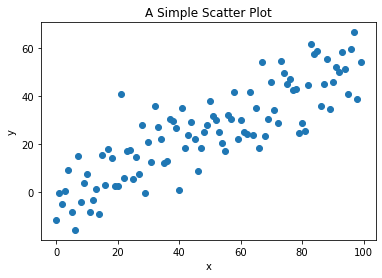

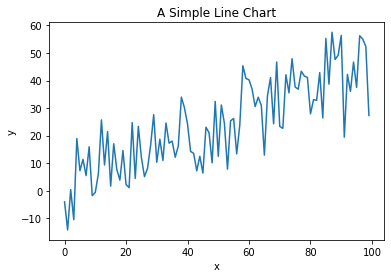

In [12]:
make_scatter_plot()
make_line_plot()

Your insight is as best as your audience understand. Data Scientist spends a lot of time to drill insight from data, but not enough time to present their insight.
Unfortunately, human perception is largely based on __visual__, a easy-to-read chart is much more likely to sell your idea with a custom matplotlib pyplot chart.
There is nothing wrong with `matplotlib`, it is custom for a user sit in front of a monitor. When it comes to presentation, you really should make some adjustment for your audience. 
Luckily, it is easy to do with the following tips.

# Apply matplotlib theme

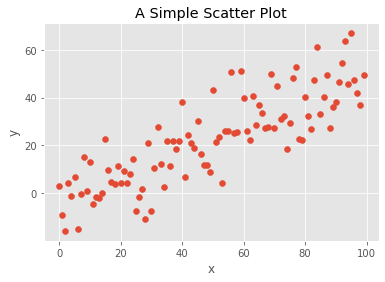

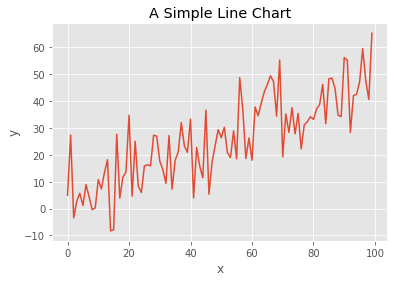

In [13]:
with plt.style.context('ggplot'): # Or plt.style.use('presentation') for global setting
    make_scatter_plot()
    make_line_plot()

Much better right?

There is nothing wrong with the chart if you are viewing it in front of your monitor. However, you may not want to put it directly into your PowerPoint.



# Make PowerPoint-ready charts

Luckily, there is some easy way to prepare PowerPoint-ready charts. I created a presentation.mplstyle file as follow.

Custom `presentation` theme
```python
axes.titlesize : 24
axes.labelsize : 24
axes.location: 'left'
lines.linewidth : 3
lines.markersize : 10
xtick.labelsize : 18
ytick.labelsize : 18
figure.figsize : 10, 6
figure.titlesize: 24

```

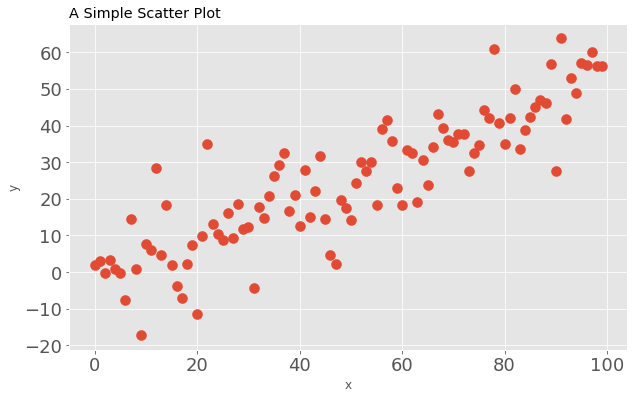

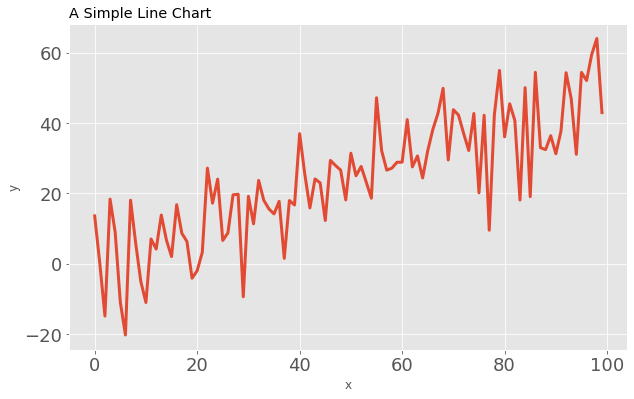

In [14]:
with plt.style.context(['presentation', 'ggplot']):
    make_scatter_plot()
    make_line_plot()

If you are careful enough, you will notice the font size of the title is not correct. This is because `ggplot` theme overwrite my theme. To make it right, you just need to switch the order so that your theme will overwrite conflict settings.

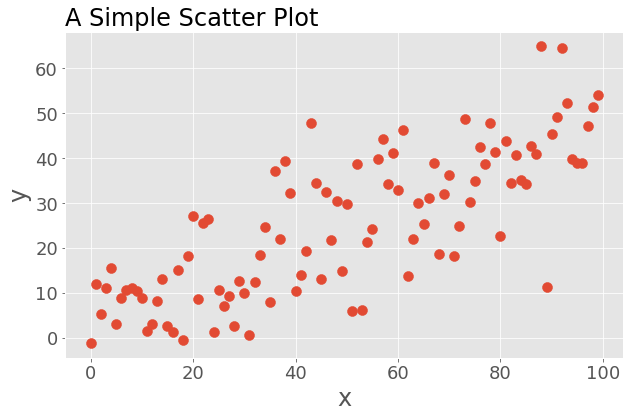

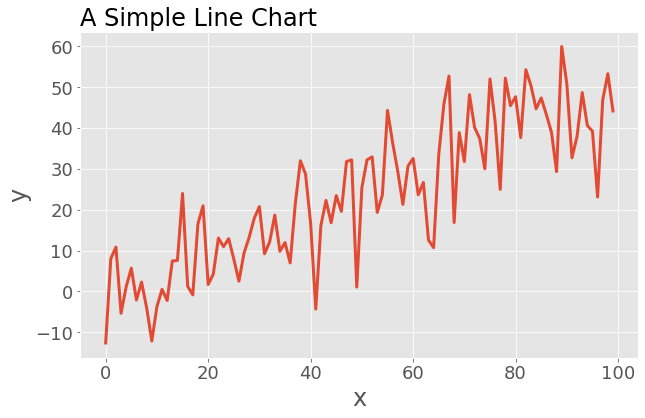

In [15]:
with plt.style.context(['ggplot', 'presentation']):
    make_scatter_plot()
    make_line_plot()

I actually disable the grid in my `presentation` theme, which conflicts with `fivethirtyeight` configuration. If conflict configs exist, it resolved base on your order. See the same plot with 'presentation','fivethirtyeight' in reverse order.

To give you a sense how this affect your presenation, I put it into a Powerpoint, see if you feel the difference.

![ppt_low_res_01.png](nb_img/ppt_low_res_01.png)

![ppt_high_res_02.png](nb_img/ppt_high_res_02.png)

## Avoid Low Resolution Chart

> Note: Believe it or not, a low resolution chart looks much less conviencing. Taking screenshot with larger charts helps you to preserve the resolution.

* Resolution of the chart is much better
* More obvious Title & Label (Try take a few step back from your monitor, see if you can read it)

# Define Once, Use Everywhere

It could be troublesome if you need to define the same file over and over in different computer/environment. You can actually use a URL. I have put my own theme in GitHub so I can always access it from anywhere.

https://raw.githubusercontent.com/noklam/mediumnok/master/_demo/python-viz/presentation.mplstyle


Bad key "font.name" on line 9 in
https://raw.githubusercontent.com/noklam/mediumnok/master/_demo/python-viz/presentation.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.1/matplotlibrc.template
or from the matplotlib source distribution


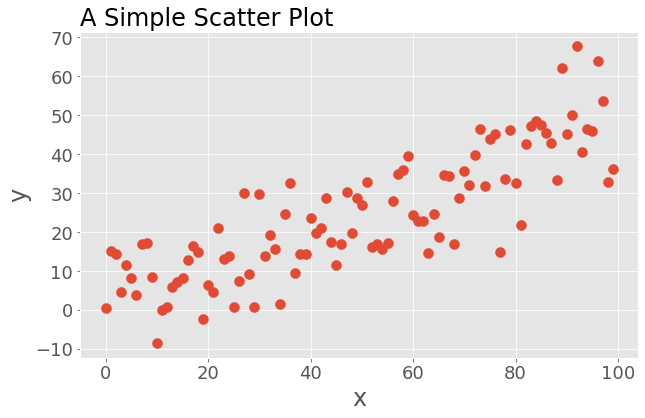

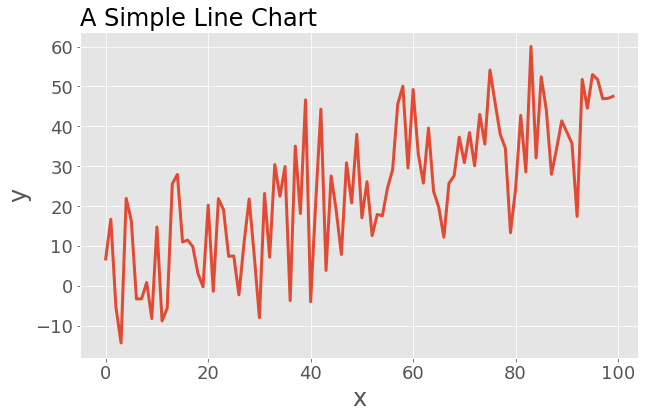

In [16]:
my_style = 'https://raw.githubusercontent.com/noklam/mediumnok/master/_demo/python-viz/presentation.mplstyle'

with plt.style.context(['ggplot', my_style]):
    make_scatter_plot()
    make_line_plot()

# Conclusion

I understand how painful it is to customize every chart, you need to get a right title, adjust font size, add label, legends. It is tedious yet very important for communications. I hope this tips can help you add a bit of personality into your presentation and prepare a better chart next time. 